In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
train = pd.read_csv('../input/train.csv')
train.head()

FileNotFoundError: File b'../input/train.csv' does not exist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: return Age
    
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [4]:
train.drop('Cabin',axis = 1, inplace = True)


In [5]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)
train.drop(['Sex','Embarked','Name','Ticket'], axis =1, inplace = True)
train = pd.concat([train,sex, embark],axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [6]:
from sklearn.model_selection import KFold


In [7]:
kf=KFold(n_splits=10)
In [9]:


SyntaxError: invalid syntax (<ipython-input-7-1044d0bea0af>, line 2)

In [8]:
kf=KFold(n_splits=10)

0.747540574282


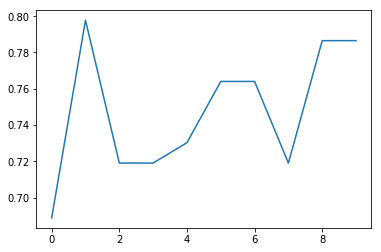

In [9]:
train1=train.drop('Survived', axis = 1)
labels=train['Survived']

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()

kf=KFold(n_splits=10, shuffle=True, random_state=False)
outcomes=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
plt.plot(range(10),outcomes)
print(np.mean(outcomes))

0.833870162297


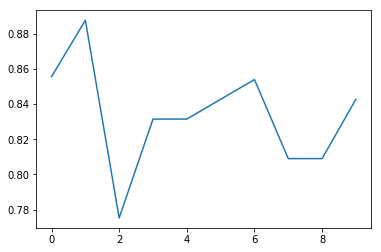

In [10]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=400)
outcomesRf=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    Rf.fit(X_train,y_train)
    predictions = Rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomesRf.append(accuracy)
plt.plot(range(10),outcomesRf)
plt.ylabel=('accuracy')
print(np.mean(outcomesRf))

In [11]:
test = pd.read_csv('test.csv')
#sns.heatmap(test.isnull(),yticklabels=False)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)
test.drop('Cabin',axis = 1, inplace = True)
#sns.heatmap(test.isnull(),yticklabels=False)
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first = True)
test.drop(['Sex','Embarked','Name','Ticket'], axis =1, inplace = True)
test = pd.concat([test,sex, embark],axis = 1)
test.dropna(axis=0, how='all')
Fare_avg = test['Fare'].mean()
def impute_Fare(col):    
    if pd.isnull(col):        
            return Fare_avg
    else: return col
test['Fare'] = test['Fare'].apply(impute_Fare)

In [12]:
Rf.fit(train1,labels)
predictions = Rf.predict(test)
Survived=pd.DataFrame(data=predictions,columns=['Survived'])
pred_final=pd.concat([test['PassengerId'],Survived],axis =1)
pred_final.to_csv('Titanic_predict_Random_Forest.csv',index=False)